In [15]:
import tensorflow as tf
import keras
from keras.applications import InceptionV3,MobileNetV2
from keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Convolution2D, BatchNormalization, MaxPool2D, Flatten, Dense, Dropout, Lambda
import matplotlib.pyplot as plt
import pickle
from keras.models import load_model


In [ ]:
#The dataset is obtained from the following link
#https://www.kaggle.com/noulam/tomato

In [4]:
#The links to the google drive directory
train = '/content/drive/My Drive/New Plant Diseases Dataset(Augmented)/train'
valid = '/content/drive/My Drive/New Plant Diseases Dataset(Augmented)/valid'

In [5]:
#Define the image size
image_size = [224,224]

In [6]:
adam=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-6, amsgrad=False)


# add preprocessing layer to the front of inceptionv3. We can remove the top and last layer of inceptionv3 model as we don't them. 
conv_base = tf.keras.applications.MobileNetV2(
    input_shape=(224,224,3),
    include_top=False,
    weights="imagenet"
)

#No need to retrain the model since we directly use the imagenet weights
conv_base.trainable = False
conv_base.summary()
#Adding the output fully connected layer with 10 nodes, and softmax activation. 
#Apart from that I have included a flatten layer following the convolutional base. 
model1 = Sequential()
model1.add(conv_base)
model1.add(Flatten())
model1.add(Dense(500,activation=('relu')))
model1.add(Dropout(0.4))
model1.add(BatchNormalization())
model1.add(Dense(10,activation=('softmax')))


model1.summary()

#Compile the model
model1.compile(
  loss='categorical_crossentropy',
  optimizer=adam,
  metrics=['accuracy']
)

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

In [7]:
#Adding data augmentation to the training images
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

#Rescaling or normalising the pixels in the image
test_datagen = ImageDataGenerator(
        rescale=1./255)

#Using the flow from directory method to read the images directly from the google drive
train_generator = train_datagen.flow_from_directory(
    directory='/content/drive/My Drive/New Plant Diseases Dataset(Augmented)/train',
    target_size=(224, 224),
    batch_size=16,
    class_mode="categorical"
)

test_generator = test_datagen.flow_from_directory(
    directory='/content/drive/My Drive/New Plant Diseases Dataset(Augmented)/valid',
    target_size=(224, 224),
    batch_size=16,
    class_mode="categorical"
)

Found 18365 images belonging to 10 classes.
Found 4595 images belonging to 10 classes.


In [8]:
#Model fitting stage
history = model1.fit_generator(train_generator,
                               epochs = 10, 
                               validation_data = test_generator,
                               steps_per_epoch = len(train_generator),
                               validation_steps = len(test_generator))

#The first epoch consumed the longest time...and the entire model is highly time consuming. 

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
1148/1148 [==============================] - 11242s 10s/step - loss: 0.7115 - accuracy: 0.7665 - val_loss: 0.4794 - val_accuracy: 0.8403
Epoch 2/10
1148/1148 [==============================] - 272s 237ms/step - loss: 0.4992 - accuracy: 0.8327 - val_loss: 0.3466 - val_accuracy: 0.8888
Epoch 3/10
1148/1148 [==============================] - 270s 235ms/step - loss: 0.4298 - accuracy: 0.8580 - val_loss: 0.3247 - val_accuracy: 0.8964
Epoch 4/10
1148/1148 [==============================] - 263s 229ms/step - loss: 0.4137 - accuracy: 0.8606 - val_loss: 0.3138 - val_accuracy: 0.8960
Epoch 5/10
1148/1148 [==============================] - 259s 225ms/step - loss: 0.3781 - accuracy: 0.8721 - val_loss: 0.4523 - val_accuracy: 0.9088
Epoch 6/10
1148/1148 [==============================] - 260s 226ms/step - loss: 0.3615 - accuracy: 0.8783 - val_loss: 0.4040 - val_accuracy: 0.8770
Epoch 7/10
1148/1148 [==============

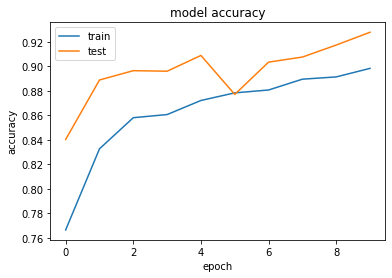

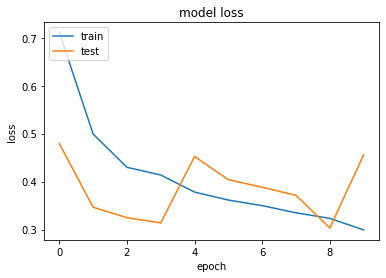

In [9]:
#Plotting the accuracy and loss
# summarize history for accuracy  
  

plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()
 
 # summarize history for loss  
  

plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()  

In [10]:
#Model evaluation
model1.evaluate_generator(generator=test_generator,
steps=len(test_generator))

#The test accuracy is 92.77% which is so far the highest acccuracy for tomota leaf disease classification

Instructions for updating:
Please use Model.evaluate, which supports generators.


[0.4557800590991974, 0.9277475476264954]

In [13]:
#Saving the model
model1.save("Mobilenet.h5")

In [16]:
#Loading the saved model
model1 = load_model("Mobilenet.h5")